# Lab 2c: Clasificación Multilabel

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab2/blob/main/solucion-c.ipynb)

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [64]:
import os

REPO_NAME = "lab2"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



## Análisis Exploratorio.

Importar librerías

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Cargar y visualizar los datos.

In [66]:
data = pd.read_csv('dataset-lab2-c.csv')
print(data.head())

         X1        X2    Y
0  0.467469  0.046469  0.0
1  0.327517  0.161267  0.0
2  0.105278  0.171040  0.0
3  0.054194  0.475245  0.0
4  0.694185  0.254754  2.0


Plot de los datos.

X1 shape: (1000,)
X2 shape: (1000,)
Y shape: (1000,)


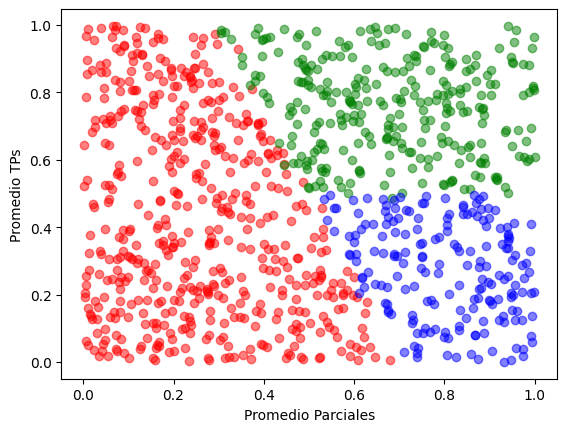

In [67]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)
print("Y shape:", Y.shape)

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)
plt.scatter(X1[Y == 2], X2[Y == 2], color='blue', alpha=0.5)

plt.xlabel('Promedio Parciales')
plt.ylabel('Promedio TPs')

plt.show()

Definimos nuestro modelo usando tensorflow.

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

Entrenamos el modelo.

*Nota: "sparse_categorical_crossentropy" encodea variables categoricas a one-hot y luego calcula binary_cross_entropy para cada componente. Nos permite utilizar `Y` directamente en formato {0,1,2} sin necesidad de encodearlo en one-hot.*

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x = np.column_stack([X1, X2])
y = Y
print(x.shape)
print(y.shape)
model.fit(x=x, y=y, epochs=50)

(1000, 2)
(1000,)
Epoch 1/50
32/32 [==============================] - 1s 4ms/step - loss: 0.5590 - accuracy: 0.7660
Epoch 2/50
 1/32 [..............................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9688

32/32 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.9020
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.9230
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.9230
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.9410
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1763 - accuracy: 0.9330
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1682 - accuracy: 0.9390
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1540 - accuracy: 0.9480
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1621 - accuracy: 0.9440
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9310
Epoch 11/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1500 - accuracy: 0.9380
Epoch 12/50
32/32 [==========

Definimos una función para plotear la frontera de decisión sobre los datos.

In [70]:
def plot_results(X1, X2, Y, model):
    plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
    plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)
    plt.scatter(X1[Y == 2], X2[Y == 2], color='blue', alpha=0.5)

    plt.xlabel('Promedio Parciales')
    plt.ylabel('Promedio TPs')

    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    # Create a meshgrid with all the possible combinations of x1 and x2
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')

    # This is equivalent to
    # x = np.array([[i, j] for i in x1 for j in x2])
    x = np.array([x1.ravel(), x2.ravel()]).T

    # Predict the value for each point in the meshgrid
    y = model.predict(x)

    # Convert from one-hot encoding to a single number
    y = np.argmax(y, axis=-1).reshape(x1.shape)

    # Use cmap red and green
    plt.contourf(x1, x2, y, alpha=0.1, cmap='RdYlGn')

    # Draw the decision boundary
    plt.contour(x1, x2, y, levels=[0, 1, 2], colors='blue')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()


Plot de la frontera de decisión.

 29/313 [=>............................] - ETA: 1s

313/313 [==============================] - 1s 3ms/step


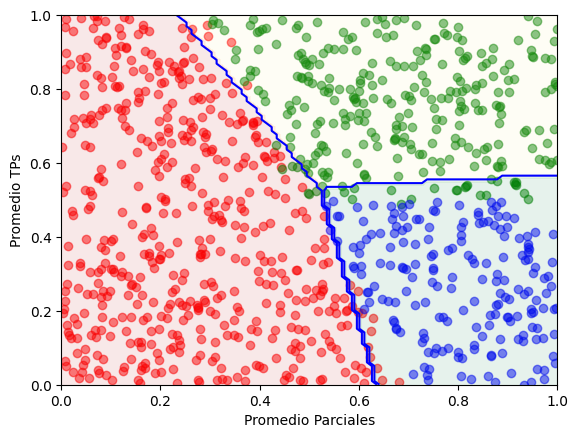

In [71]:
plot_results(X1, X2, Y, model)

Vemos que el modelo llega a una solución aceptable.

Probemos entonces con un modelo más complejo (para ver que pasa).

*Nota: el entrenamiento puede no converger a una solución óptima. Se propone correr el entrenamiento varias veces hasta que se obtenga una solución aceptable. Más adelante estudiaremos técnicas para mejorar la convergencia.*

Epoch 1/50


32/32 [==============================] - 1s 5ms/step - loss: 0.6138 - accuracy: 0.7380
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1817 - accuracy: 0.9300
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1457 - accuracy: 0.9410
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9220
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9300
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1011 - accuracy: 0.9550
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9350
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1411 - accuracy: 0.9370
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9660
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9690
Epoch 11/50
32/32 [===========

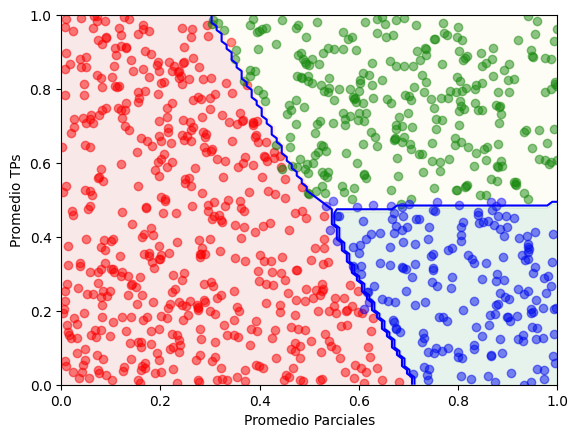

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=x, y=y, epochs=50)

plot_results(X1, X2, Y, model)